In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df3 = pd.read_csv(r"/content/IRIS.csv")

In [ ]:
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df3.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df3.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df3['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

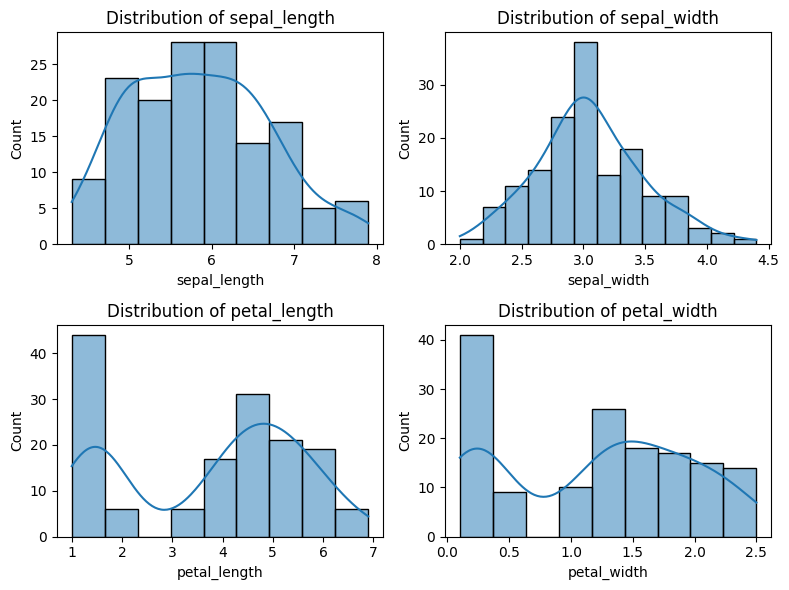

In [ ]:
# Data Visualization and Analysis
plt.figure(figsize=(8,6))
for i, column in enumerate(df3.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df3[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# These histogram plots show the distribution of each feature as sepal length, sepal width, petal length, and petal width.

# The KDE (Kernel Density Estimate) line provides a smooth estimate of the distribution.

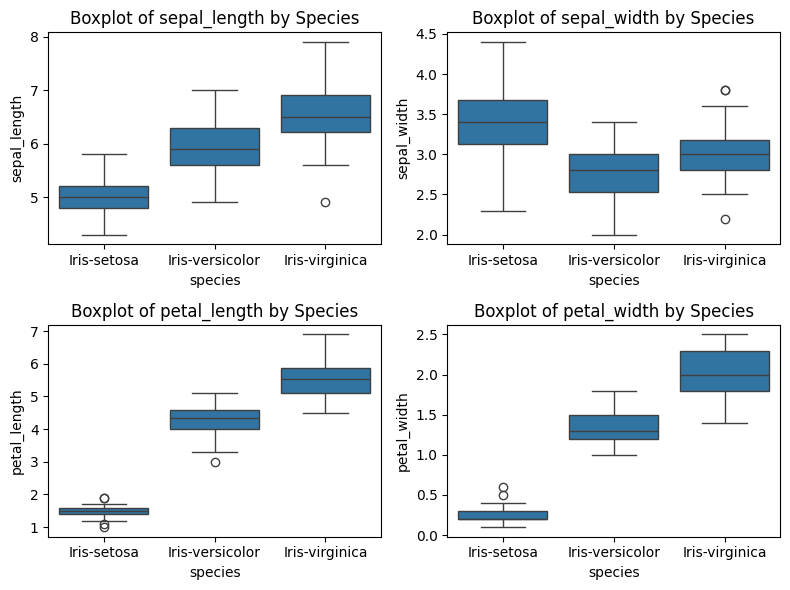

In [ ]:
plt.figure(figsize=(8,6))
for i, column in enumerate(df3.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df3)
    plt.title(f'Boxplot of {column} by Species')
plt.tight_layout()
plt.show()

In [ ]:
# Here Boxplots display the distribution of each feature across the three species. They show the median, quartiles, and potential outliers.

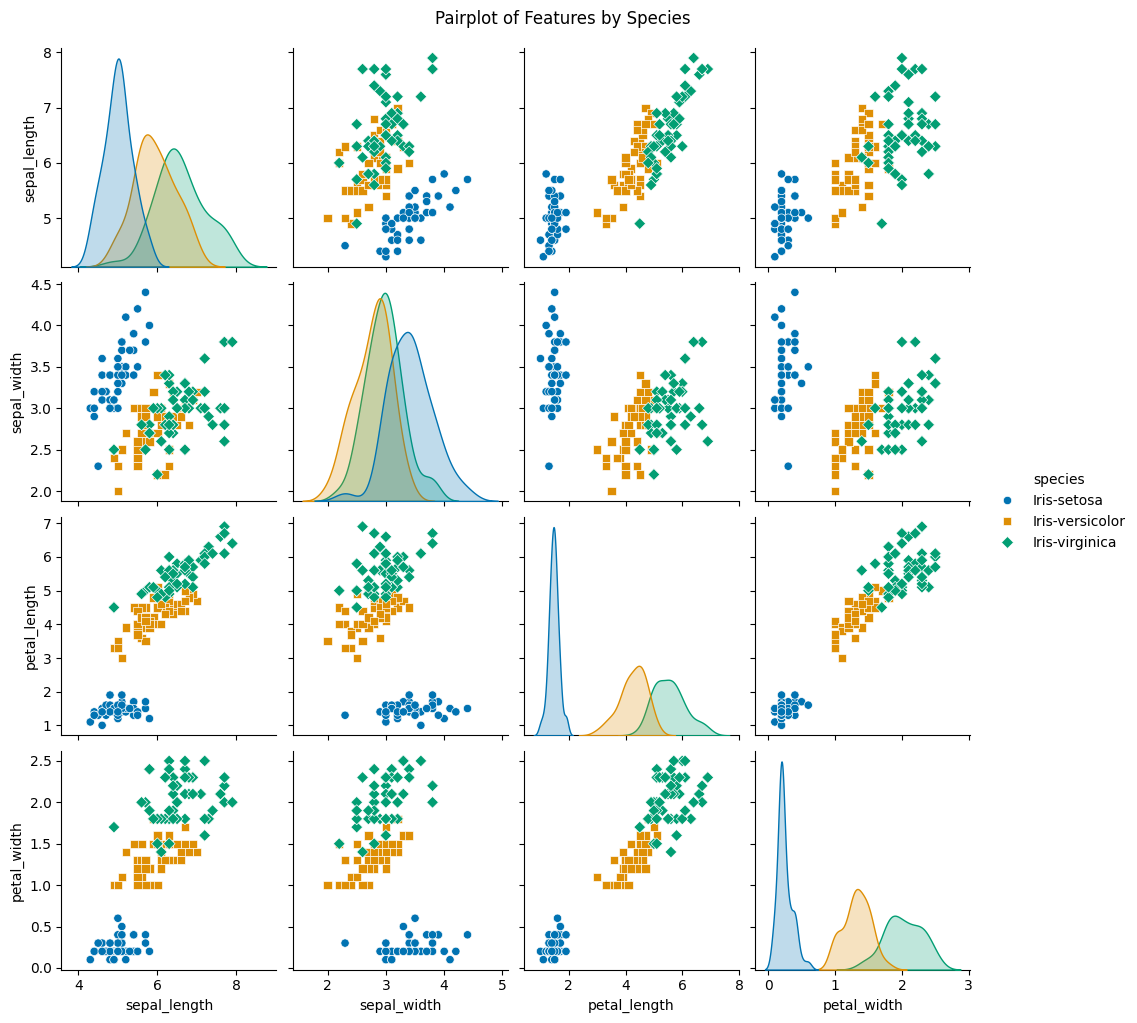

In [ ]:
sns.pairplot(df3, hue='species', markers=["o", "s", "D"], palette='colorblind')
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()

In [ ]:
# The pairplot shows scatter plots for each pair of features, color-coded by species. This helps to visualize the relationships and separability between different species based on feature pairs.

In [ ]:
numerical_columns=df3.dtypes[df3.dtypes!='object'].index
df3[numerical_columns]=df3[numerical_columns]
df3[numerical_columns].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


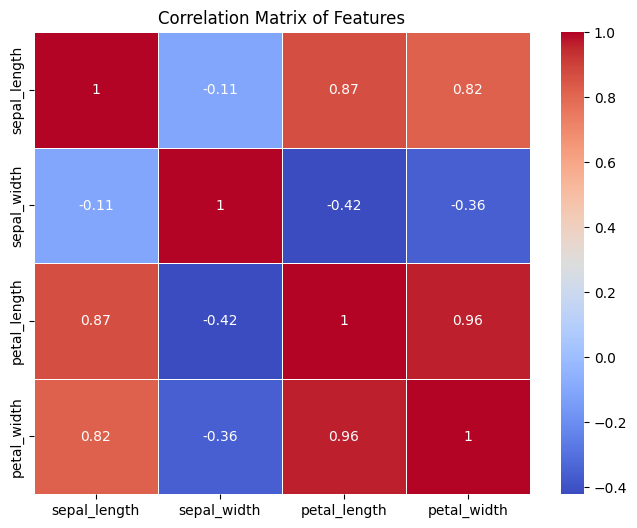

In [ ]:
plt.figure(figsize=(8,6))
correlation_matrix = df3[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# # Data Preprocessing
# Since the dataset is well-structured, we may not need much preprocessing, but we should ensure there are no missing values and encode the categorical target variable.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the species column
label_encoder = LabelEncoder()
df3['species'] = label_encoder.fit_transform(df3['species'])
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Split the data into Training and Testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# take X and y as features and target variable respectively
X = df3.drop(columns=['species'])
y = df3['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

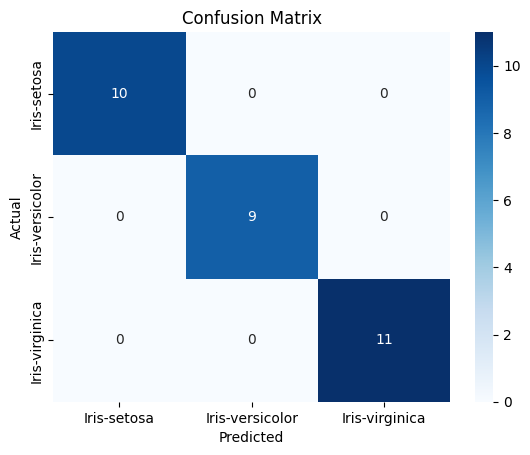

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# The accuracy of the Random Forest classifier is high, typically close to 1.0 or 100%.

# This indicates that the model correctly classifies most of the Iris flowers into their respective species.